In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown

%matplotlib inline
plt.style.use('ggplot')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-salaries-in-ai-ml-data-science/salaries.json
/kaggle/input/global-salaries-in-ai-ml-data-science/salaries.csv


#### Data Loading and Cleaning

In [2]:
# Read the data and show the number of datapoints and a preview
csv_file = '/kaggle/input/global-salaries-in-ai-ml-data-science/salaries.csv'
df = pd.read_csv(csv_file)
display(df.shape)
df.head(1)

(8805, 11)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EX,FT,Data Science Director,212000,USD,212000,US,0,US,M


In [3]:
# get the general overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8805 entries, 0 to 8804
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           8805 non-null   int64 
 1   experience_level    8805 non-null   object
 2   employment_type     8805 non-null   object
 3   job_title           8805 non-null   object
 4   salary              8805 non-null   int64 
 5   salary_currency     8805 non-null   object
 6   salary_in_usd       8805 non-null   int64 
 7   employee_residence  8805 non-null   object
 8   remote_ratio        8805 non-null   int64 
 9   company_location    8805 non-null   object
 10  company_size        8805 non-null   object
dtypes: int64(4), object(7)
memory usage: 756.8+ KB


In [4]:
# check for nulls
display(df.isna().any().sum())

# drop duplicates
df.drop_duplicates(inplace=True)

0

In [5]:
# convert objects to category data type
for col in df.columns:
    if df[col].dtype == 'O':
        df[col] = df[col].astype('category')

In [6]:
# number of unique values in the categories
for col in df.columns:
    if df[col].dtype == 'category':
        print(f"\t {col} >> {df[col].nunique()} categories")

	 experience_level >> 4 categories
	 employment_type >> 4 categories
	 job_title >> 124 categories
	 salary_currency >> 22 categories
	 employee_residence >> 86 categories
	 company_location >> 74 categories
	 company_size >> 3 categories


In [7]:
df.tail(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
8803,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
8804,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


#### Analysis

In [8]:
# util functions
def get_value_range(col: str):
    """
    params: col: str - the column name
    return: an f-string of the min and max values of the column
    """
    return f"{df[col].min()} - {df[col].max()}"

In [9]:
# year range, salary range (USD)
print(f"Years: {get_value_range('work_year')} \nSalary (USD): {get_value_range('salary_in_usd')}")

Years: 2020 - 2023 
Salary (USD): 15000 - 615201


In [10]:
# mean salaries for jobs with location
mean_salary_df = df.groupby(['job_title', 'company_location', 'company_size'])['salary_in_usd'].mean().dropna().sort_values(ascending=False).reset_index()
top_10 = mean_salary_df.head(10)
bottom_10 = mean_salary_df.tail(10)

# top 10 highest paying jobs
display(Markdown(' ### 10 highest paying jobs'))
display(top_10.T)

# bottom 10 least paying jobs
display(Markdown(' ### 10 least paying jobs'))
display(bottom_10.T)

 ### 10 highest paying jobs

,0,1,2,3,4,5,6,7,8,9
job_title,Business Intelligence Consultant,AI Scientist,Principal Data Scientist,Data Analytics Lead,Analytics Engineering Manager,Data Science Tech Lead,Finance Data Analyst,Managing Director Data Science,AI Engineer,Director of Data Science
company_location,IN,IL,US,US,GB,US,US,US,QA,US
company_size,S,L,S,L,L,L,M,L,M,L
salary_in_usd,615201.0,417937.0,416000.0,405000.0,399880.0,375000.0,323905.0,300000.0,300000.0,287500.0


 ### 10 least paying jobs

,588,589,590,591,592,593,594,595,596,597
job_title,Product Data Analyst,Data Scientist,ML Engineer,Computer Vision Engineer,Data Analyst,Data Analyst,Business Intelligence Developer,Data Analyst,Staff Data Analyst,Machine Learning Developer
company_location,IN,EC,DE,IN,IN,PH,GH,ID,CA,TH
company_size,L,L,S,M,S,L,M,L,M,L
salary_in_usd,16417.0,16000.0,15966.0,15897.0,15809.0,15680.0,15000.0,15000.0,15000.0,15000.0


There seem to a very high disparity in salaries with company location than company size.

Text(0.5, 0, 'Salary (USD)')

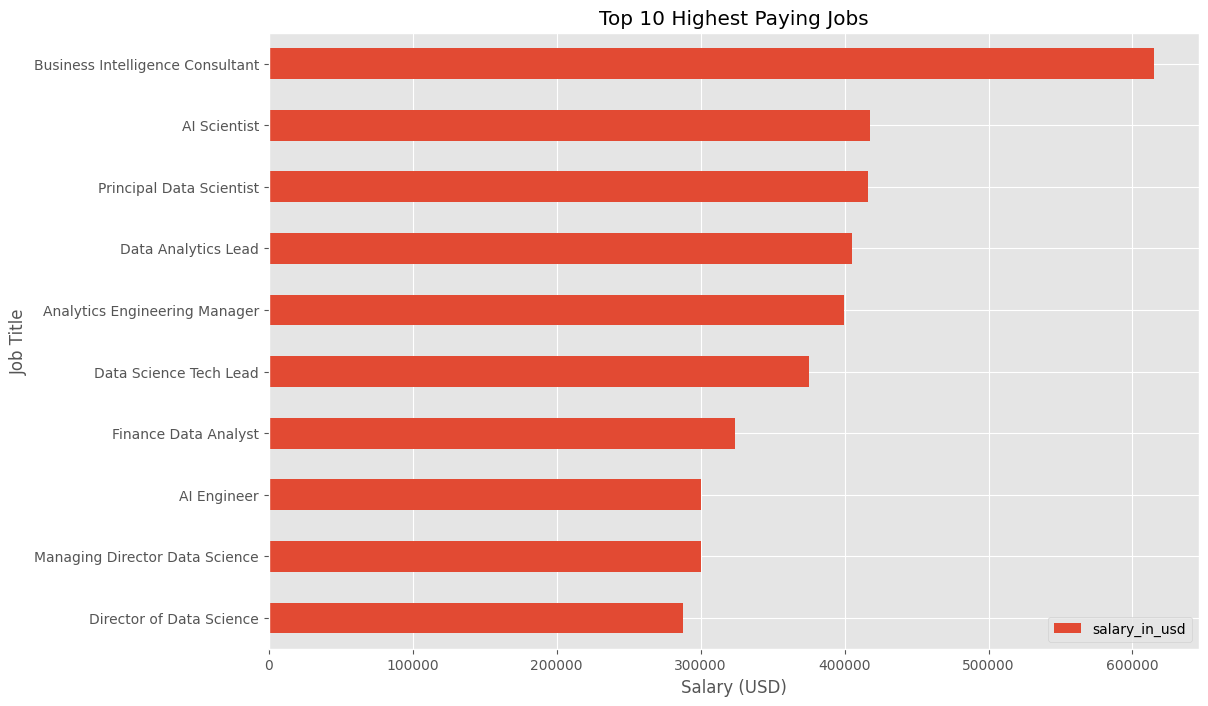

In [11]:
top_10.sort_values(by='salary_in_usd').plot(x='job_title', y='salary_in_usd', kind='barh', figsize=(12, 8))
plt.title('Top 10 Highest Paying Jobs')
plt.ylabel('Job Title')
plt.xlabel('Salary (USD)')


Text(0.5, 0, 'Salary (USD)')

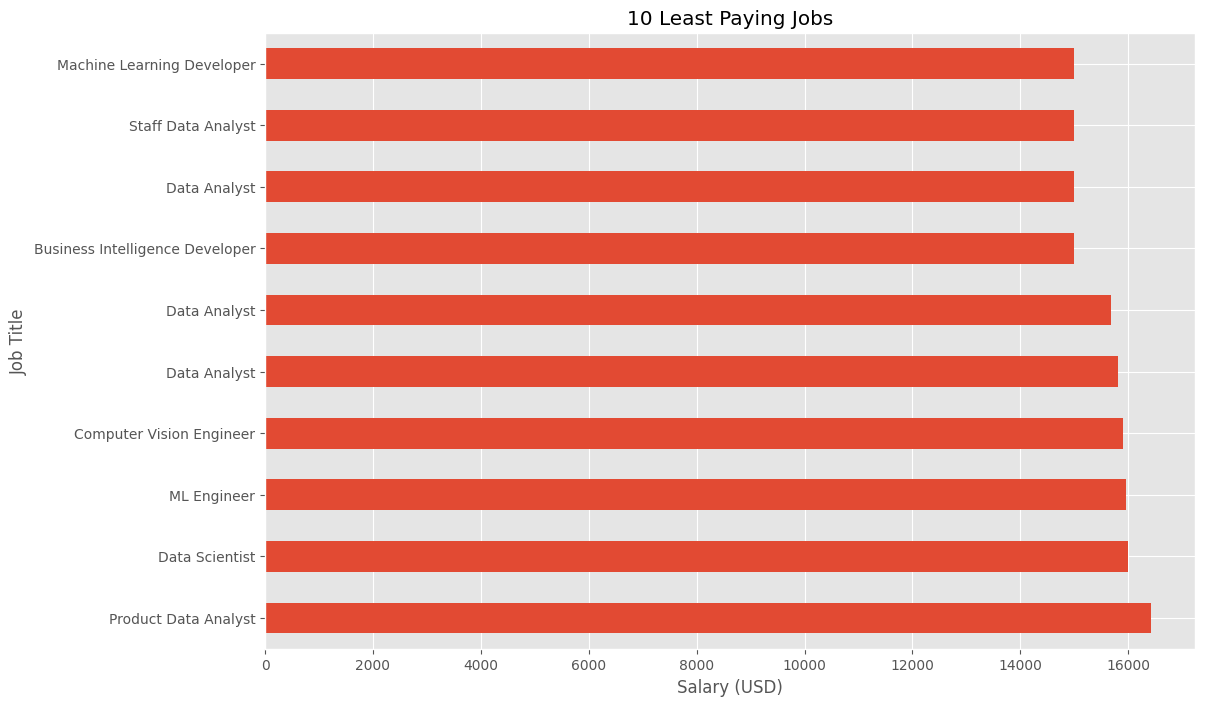

In [12]:
bottom_10.plot(x='job_title', y='salary_in_usd', kind='barh', figsize=(12, 8), legend=None)
plt.title('10 Least Paying Jobs')
plt.ylabel('Job Title')
plt.xlabel('Salary (USD)')